In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Patient ID,Patient Age,Patient Gender,Patient Health Condition,Previous Doctor Type,Last Appointment (Days)
patient_info=[1,72,0,41,76,293]

In [3]:
data_doctors=pd.read_csv('./data/doctors_data.csv')

In [4]:
recommender_model=tf.keras.models.load_model('./Models/recommender-ensemble.h5')

In [5]:
data_doctors.describe()

,Doctor ID,Doctor Age,Doctor Location,Doctor Type,Experience (Years),Patients in Lifetime,Patients in Queue,Pev_Visited
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2501.145800,72.142000,51.455000,49.948200,17.978274,1500.099033,30.005300,0.20000
std,288.613467,32.563629,32.306914,29.010568,9.214297,710.132120,14.176786,0.40004
min,2000.000000,0.000000,-38.000000,0.000000,0.001420,400.028351,8.001542,0.00000
25%,2251.750000,49.000000,27.000000,25.000000,10.415207,950.982514,19.034949,0.00000
50%,2506.000000,72.000000,52.000000,50.000000,17.872687,1497.256062,30.087614,0.00000
75%,2748.250000,95.000000,76.000000,76.000000,25.640173,2049.170021,41.007077,0.00000
max,2999.000000,144.000000,137.000000,100.000000,35.997055,2599.716065,51.999524,1.00000


In [6]:
data_patients=[patient_info for i in range(len(data_doctors))] 

In [7]:
data_patients=np.array(data_patients)

In [8]:
ypred=recommender_model.predict([data_patients,data_doctors])

157/157 [==============================] - 0s 714us/step


In [9]:
ypred=np.argmax(ypred,axis=1)

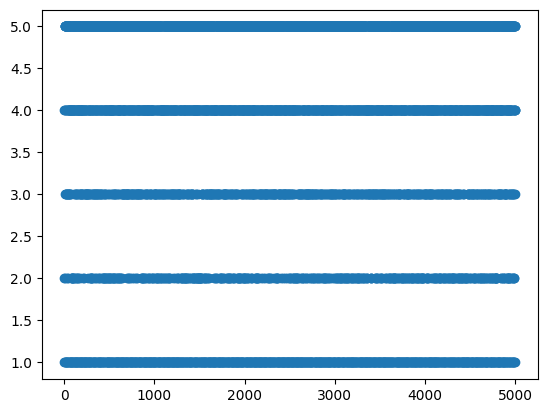

In [10]:
plt.scatter(range(len(ypred)),ypred)

In [11]:
# sort the index of the doctors based on the predicted values of ratings

sorted_index=np.argsort(ypred)

In [12]:
final_doctors_list=data_doctors.iloc[sorted_index]

In [13]:
final_doctors_list

,Doctor ID,Doctor Age,Doctor Location,Doctor Type,Experience (Years),Patients in Lifetime,Patients in Queue,Pev_Visited
0,2973,133.0,82,51,6.147941,573.609438,8.012773,0
1735,2299,89.0,99,28,6.199279,435.838683,9.552955,0
4380,2928,110.0,17,10,8.864994,536.917095,11.455808,0
1730,2059,78.0,81,48,4.904597,450.996347,10.141105,0
1725,2453,142.0,87,51,4.511853,511.796454,10.898378,0
...,...,...,...,...,...,...,...,...
2478,2633,69.0,90,11,19.610816,1974.922005,40.967667,0
2479,2414,53.0,91,11,27.352783,2427.932350,50.211724,1
2483,2333,79.0,67,94,24.841753,1987.647370,40.713565,0
2489,2960,21.0,22,40,24.239730,2457.544554,51.276659,1


In [14]:
# from the final_doctors_list we can get the top 5 doctors matching the patient's requirements and location

final_doctors_list=final_doctors_list[final_doctors_list['Doctor Location']==patient_info[2]]

In [15]:
final_doctors_list

,Doctor ID,Doctor Age,Doctor Location,Doctor Type,Experience (Years),Patients in Lifetime,Patients in Queue,Pev_Visited
1210,2273,91.0,0,54,9.278762,466.072300,9.399545,0
3545,2360,143.0,0,13,9.566923,568.214469,11.624246,0
3520,2613,125.0,0,33,0.590323,473.110688,8.099609,0
1061,2714,110.0,0,6,8.781310,973.363996,18.543211,0
4481,2071,59.0,0,35,12.493043,995.970306,20.383355,0
4216,2656,110.0,0,100,6.757174,1072.408976,21.649671,0
2711,2008,97.0,0,60,6.909076,1004.622057,19.111715,0
943,2885,87.0,0,15,27.564310,1995.701702,41.381246,0
3902,2657,77.0,0,100,22.098424,1504.428789,29.771913,0
3067,2351,99.0,0,35,20.095828,1427.207271,29.738790,0


In [16]:
# sending the doctor's list to the patient backend

final_doctors_list=final_doctors_list['Doctor ID'].values

In [17]:
list(final_doctors_list)

[2273,
 2360,
 2613,
 2714,
 2071,
 2656,
 2008,
 2885,
 2657,
 2351,
 2955,
 2613,
 2095,
 2902,
 2564,
 2890,
 2657,
 2805,
 2450,
 2818]

In [18]:
import json

json({'doctors':list(final_doctors_list)})

TypeError: 'module' object is not callable